In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

os.chdir('/home/yuanyu/projects/rush')

In [9]:
output_dir = './data/files'

gas_csv = './data/dataset/gas/gas.csv'
fire_gas_csv = './data/dataset/fire/fire.csv'

In [4]:
def plot_and_save_score_gif(data: pd.Series, save_path: str, yticks=np.arange(0, 1.1, 0.1)) -> animation.Animation:
    fig = plt.figure()
    ims = []
    for i in range(len(data)):
        im = plt.plot(data.iloc[:i])
        plt.yticks(yticks)
        ims.append(im)
    ani = animation.ArtistAnimation(fig,
                                    ims,
                                    interval=50,
                                    repeat_delay=1000)

    ani.save(save_path, writer='pillow')


## 1 异常气体泄露

In [5]:
gas_df = pd.read_csv(gas_csv, skipinitialspace=True, index_col=0)
gas_df.head()

,PM1,PM10,PM2.5,CH4,H2S,CO,flamGas
id,,,,,,,
1,17,31,22,0,0,0,0
2,17,31,22,0,0,0,0
3,18,33,23,0,0,0,0
4,18,33,23,0,0,0,0
5,17,31,22,0,0,0,0


PM1
PM10
PM2.5
CH4
H2S
CO
flamGas
Temperature


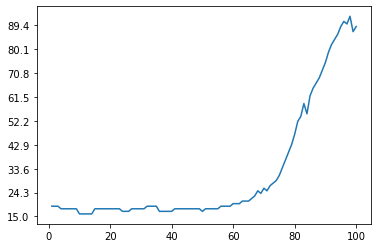

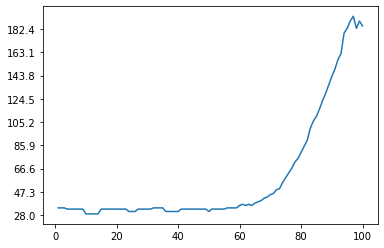

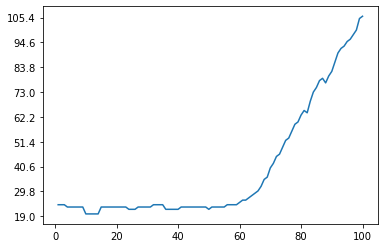

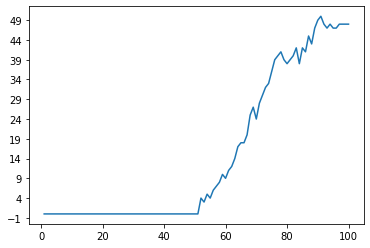

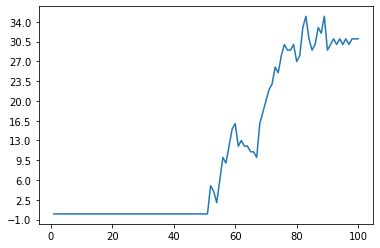

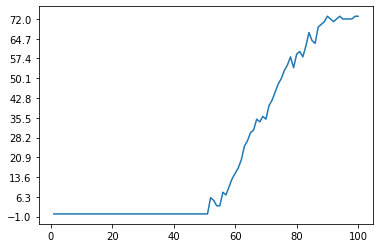

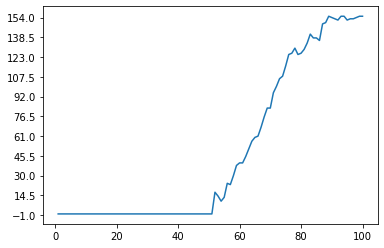

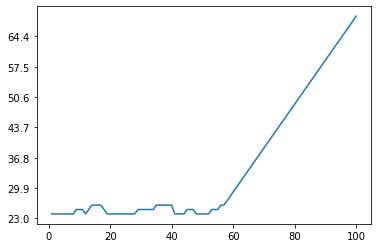

In [13]:
for col_index, col in gas_df.iteritems():
    print(col_index)
    save_path = f'{output_dir}/gas_{col_index}.gif'
    yticks = np.arange(np.min(col)-1, np.max(col)+1, np.max(col)/10)
    plot_and_save_score_gif(col, save_path, yticks)


## 2 火灾中异常气体浓度

In [10]:
gas_df = pd.read_csv(fire_gas_csv, skipinitialspace=True, index_col=0)
gas_df.head()

,PM1,PM10,PM2.5,CH4,H2S,CO,flamGas,Temperature
id,,,,,,,,
1,19,34,24,0,0,0,0,24
2,19,34,24,0,0,0,0,24
3,19,34,24,0,0,0,0,24
4,18,33,23,0,0,0,0,24
5,18,33,23,0,0,0,0,24


PM1
PM10
PM2.5
CH4
H2S
CO
flamGas
Temperature


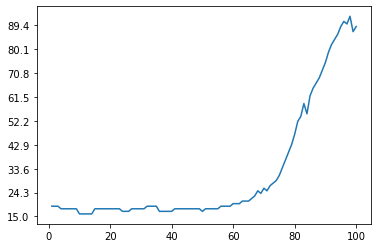

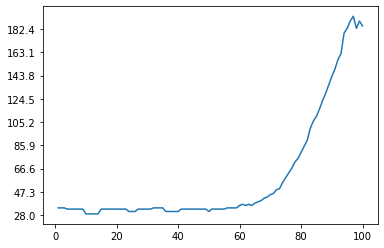

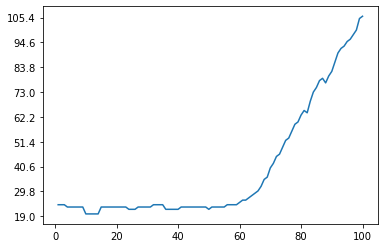

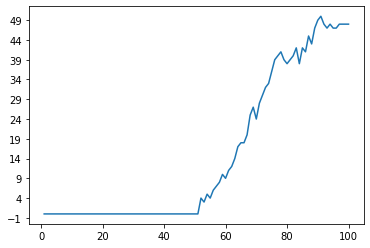

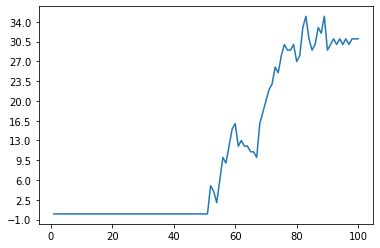

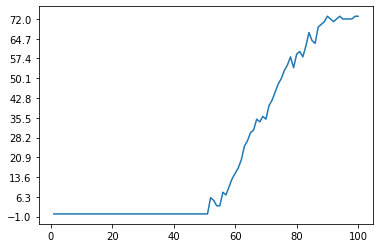

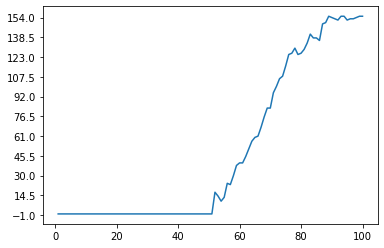

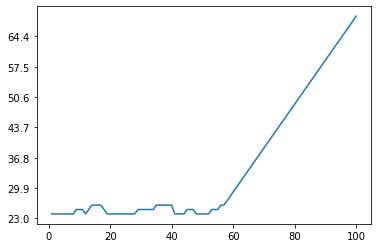

In [14]:
for col_index, col in gas_df.iteritems():
    print(col_index)
    save_path = f'{output_dir}/fire_{col_index}.gif'
    yticks = np.arange(np.min(col)-1, np.max(col)+1, np.max(col)/10)
    plot_and_save_score_gif(col, save_path, yticks)
